###Import Module

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import SGDClassifier
import timeit
from tqdm import tqdm
from scipy.stats import multivariate_normal
from statistics import mean

###Load Data

In [ ]:
data = pd.read_csv('Frogs_MFCCs.csv')
data.drop(data.tail(1).index,inplace=True) # drop last n rows remove nan value
df = data.drop(columns=['Genus', 'Species', 'RecordID'])

In [ ]:
#df.info()
#df.head()
#sum(df.duplicated()) it's equals to zero, our data is clean
#seperate values and label
X = df.iloc[:,:-1]
y = df.Family
#LabelEncoding 
classes = list(df['Family'].unique())
class_no = list(range(len(classes)))
class_dict = {cls:index for cls, index in zip(classes, class_no)}
y = y.map(lambda x: class_dict[x])
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
7189    2
7190    2
7191    2
7192    2
7193    2
Name: Family, Length: 7194, dtype: int64


In [ ]:
# train , test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 5, stratify = y)
#scaled dataset
# scaler = preprocessing.StandardScaler().fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# print(X_train)
# print(X_train_scaled)

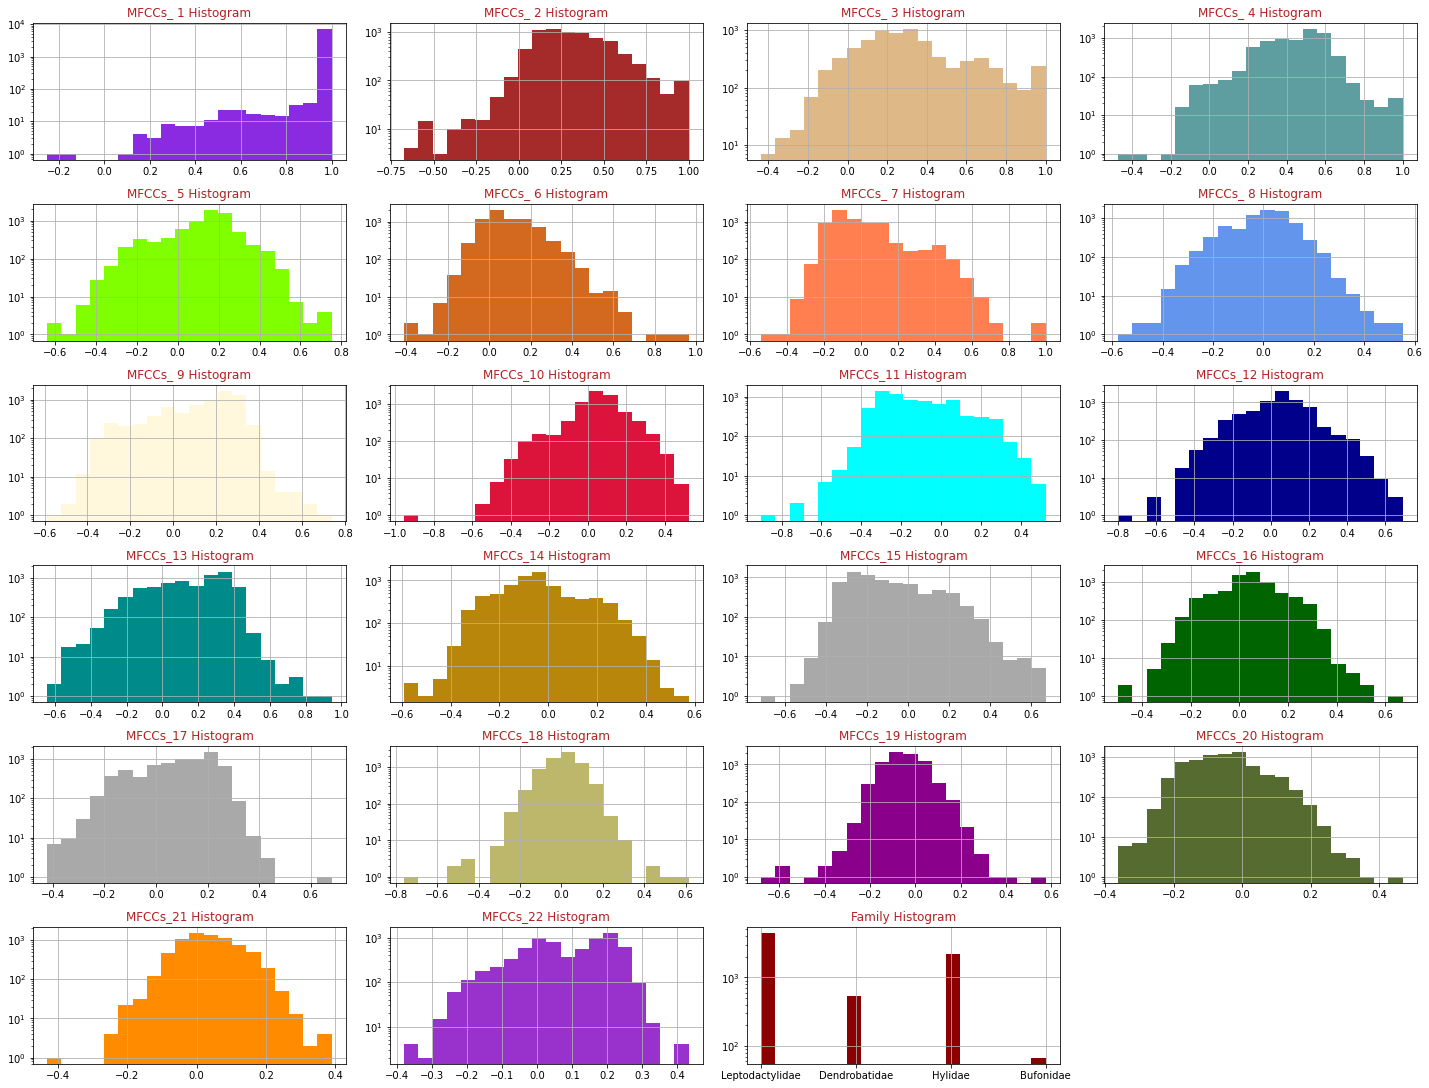

In [ ]:
#Plotting histograms to understand the values of each variable is a good place to start
import matplotlib.colors as mcolors
colors = list(mcolors.CSS4_COLORS.keys())[10:]
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor=colors[i])
        ax.set_title(feature+" Histogram",color=colors[35])
        ax.set_yscale('log')
    fig.tight_layout() 
    plt.savefig('Histograms.png')
    plt.show()
draw_histograms(df,df.columns,8,4)

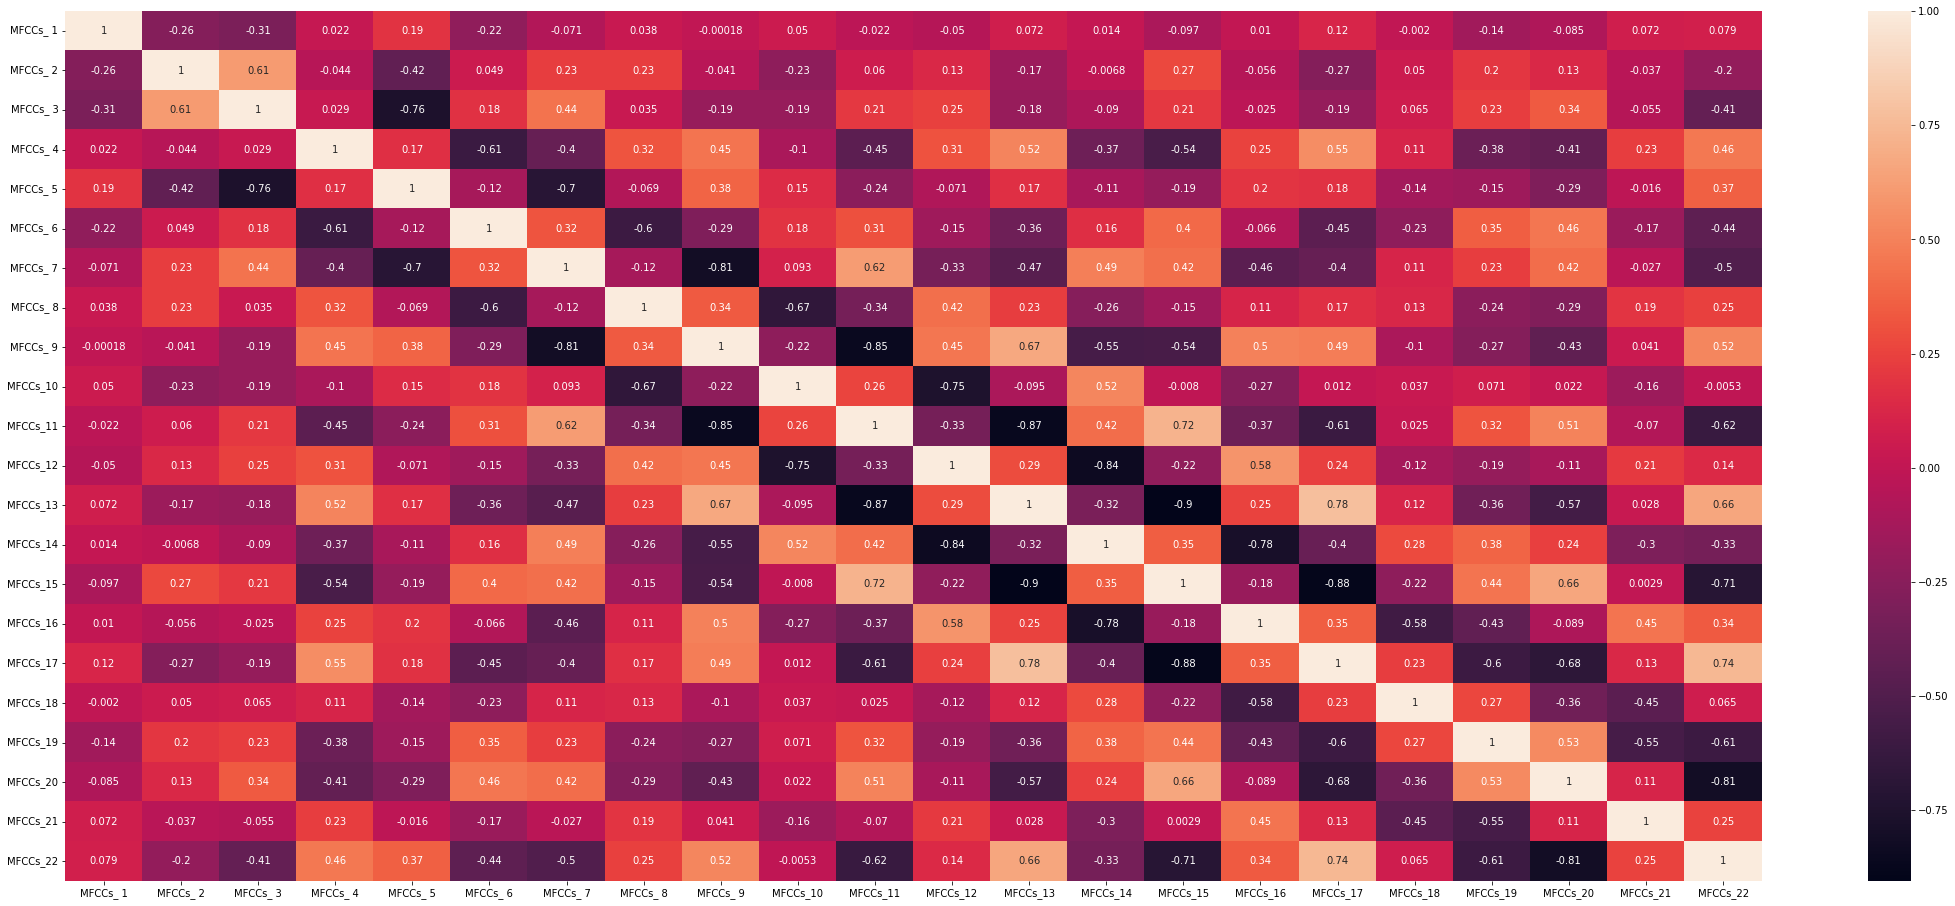

In [ ]:
 #observe the dependency of variables on each other by studying their correlation
plt.figure(figsize = (38,16))
sns.heatmap(df.corr(),annot = True)
plt.savefig('heatmap.png')
plt.show()


### Building the Logistic Regression Model

Confusion matrix:
 [[3430   29   77    0]
 [   8  403   23    0]
 [ 153   44 1534    0]
 [   7    0   47    0]]
Training accuracy: 93.2580 %
Train matrix acc: [87.85403996524761, 91.98957428323197, 92.91051259774109, 93.25803649000869]
testing accuracy: 94.1626 %
test matrix acc: [88.46421125781792, 92.98123697011815, 94.30159833217512, 94.1626129256428]
Time:  [0.003693772000019635, 0.003343668000013622, 0.00838573499999029, 0.00361591299997599]
overal time:  0.49546995800000104


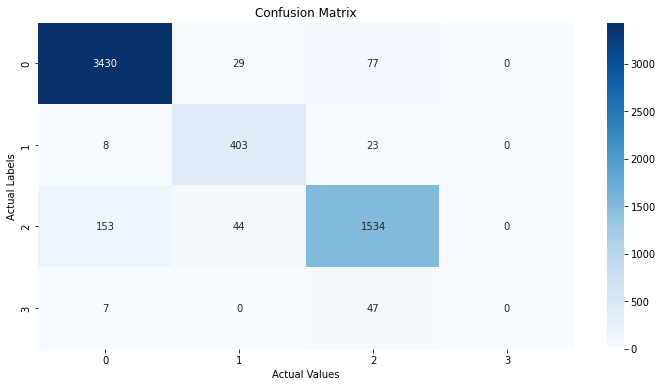

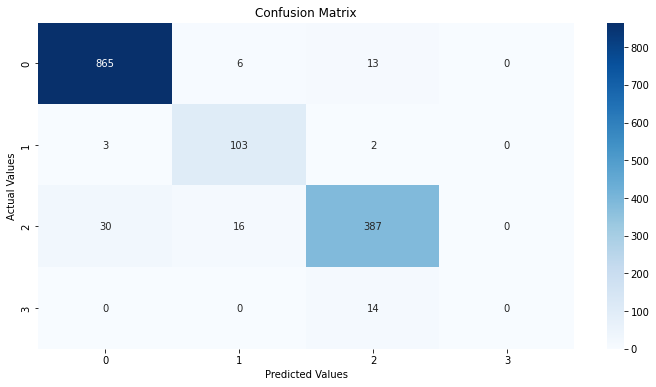

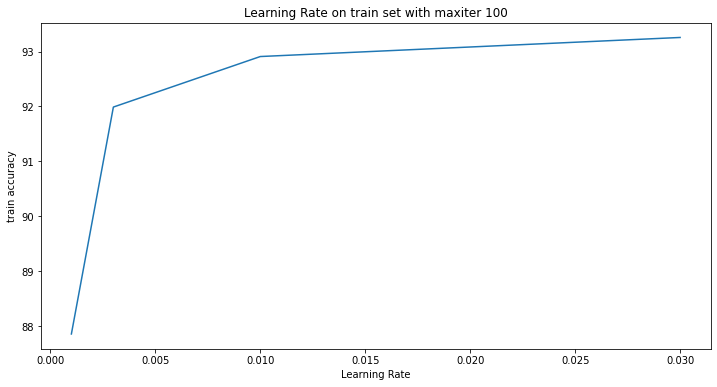

<Figure size 432x288 with 0 Axes>

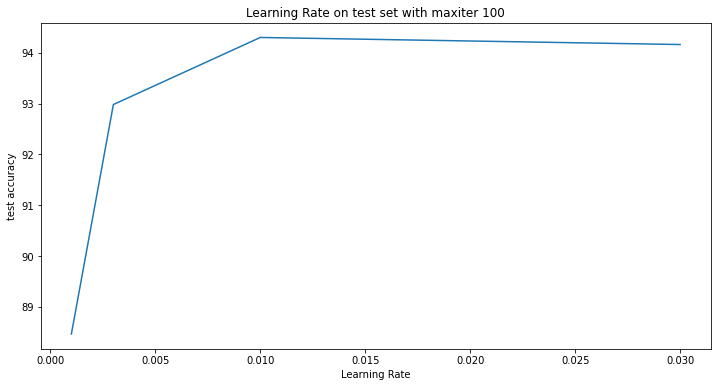

<Figure size 432x288 with 0 Axes>

In [ ]:
#Evaluate Model on training set
start = timeit.default_timer()
learning_rate_list = [0.001, 0.003, 0.01,0.03]
max_iter_list = [10, 40, 70, 100]
maxiter = 100
train_acc_matrix = []
test_acc_matrix = []
time_matrix = []

for i in learning_rate_list:
  model = SGDClassifier(max_iter = maxiter, learning_rate = 'constant', eta0 = i )
  # model = LogisticRegression(max_iter=maxiter)
  #train model
  model.fit(X_train,y_train)
  train_acc = model.score(X_train, y_train)
  # print("the accuracy for training set is {}".format(train_acc*100))
  #training score
  y_train_hat = model.predict(X_train)
  train_acc = accuracy_score(y_train, y_train_hat)*100
  train_acc_matrix.append(train_acc)
  cm_train = confusion_matrix(y_train, y_train_hat)
  
  #Evalute Model on test set
  start = timeit.default_timer()
  y_test_hat = model.predict(X_test)
  test_acc = accuracy_score(y_test, y_test_hat)*100
  test_acc_matrix.append(test_acc)
  # print('Confusion matrix:\n', confusion_matrix(y_test, y_test_hat))
  # print('Testing accuracy: %.4f %%' % test_acc) 
  cm_test=confusion_matrix(y_test,y_test_hat)
  stop = timeit.default_timer()
  time_matrix.append(stop - start)
  

#train
print('Confusion matrix:\n', cm_train)
print('Training accuracy: %.4f %%' % train_acc)
print('Train matrix acc:', train_acc_matrix)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm_train, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Labels")
plt.xlabel("Actual Values")
plt.savefig('confusion_matrix_training.png')

#test
print('testing accuracy: %.4f %%' % test_acc)
print('test matrix acc:', test_acc_matrix)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm_test, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix_testing.png')
stop = timeit.default_timer()

print('Time: ', time_matrix, end='\n')
print('overal time: ', stop - start) 

#learning Rate on train figure
plt.figure(figsize=(12,6))
plt.title("Learning Rate on train set with maxiter 100")
plt.xlabel("Learning Rate")
plt.ylabel("train accuracy")
plt.plot(learning_rate_list ,train_acc_matrix)
plt.show()
plt.savefig('train acc learning rate.png')

#learning rate on test figure
plt.figure(figsize=(12,6))
plt.title("Learning Rate on test set with maxiter 100")
plt.xlabel("Learning Rate")
plt.ylabel("test accuracy")
plt.plot(learning_rate_list ,test_acc_matrix)
plt.show()
plt.savefig('test acc learning rate.png')

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


Confusion matrix:
 [[3446   26   64    0]
 [  13  399   22    0]
 [ 188   47 1496    0]
 [   7    0   47    0]]
Training accuracy: 92.8063 %
Train matrix acc: [91.9721980886186, 92.89313640312771, 92.92788879235448, 92.80625543006082]
testing accuracy: 94.0236 %
test matrix acc: [92.77275886031967, 94.09312022237664, 94.23210562890897, 94.02362751911049]
Time:  [0.0036321339999858537, 0.0036087039999870285, 0.0036681900000417045, 0.003526748000012958]
overal time:  0.5073941649999938


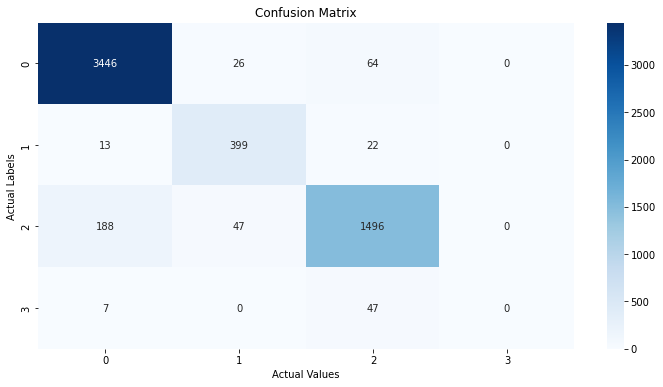

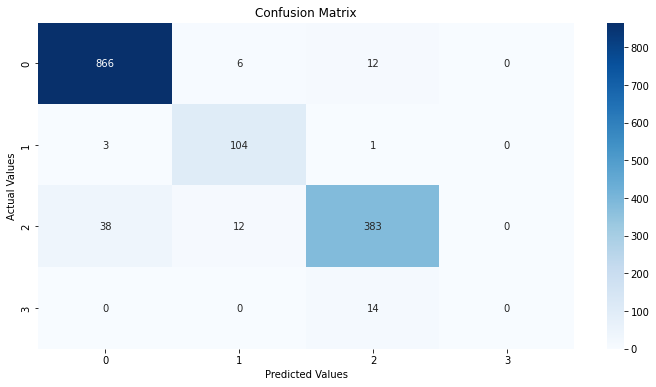

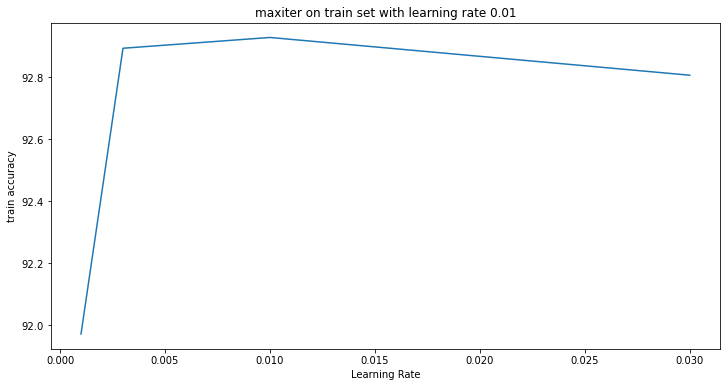

<Figure size 432x288 with 0 Axes>

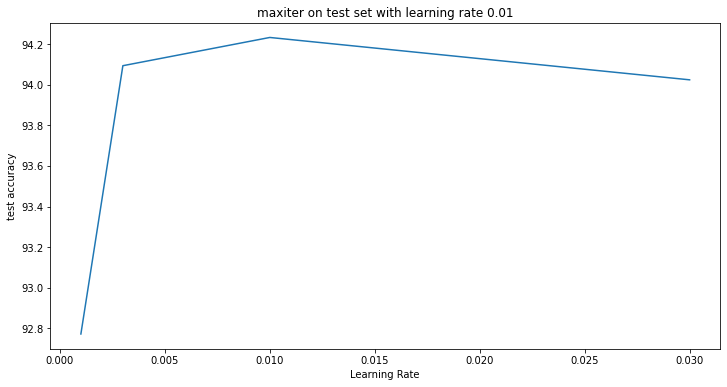

<Figure size 432x288 with 0 Axes>

In [ ]:
#Evaluate Model on training set
start = timeit.default_timer()
learningrate = 0.01
max_iter_list = [10, 40, 70, 100]
train_acc_matrix = []
test_acc_matrix = []
time_matrix = []

for i in max_iter_list:
  model = SGDClassifier(max_iter = i, learning_rate = 'constant', eta0 = learningrate)
  # model = LogisticRegression(max_iter=maxiter)
  #train model
  model.fit(X_train,y_train)
  train_acc = model.score(X_train, y_train)
  # print("the accuracy for training set is {}".format(train_acc*100))
  #training score
  y_train_hat = model.predict(X_train)
  train_acc = accuracy_score(y_train, y_train_hat)*100
  train_acc_matrix.append(train_acc)
  cm_train = confusion_matrix(y_train, y_train_hat)
  
  #Evalute Model on test set
  start = timeit.default_timer()
  y_test_hat = model.predict(X_test)
  test_acc = accuracy_score(y_test, y_test_hat)*100
  test_acc_matrix.append(test_acc)
  # print('Confusion matrix:\n', confusion_matrix(y_test, y_test_hat))
  # print('Testing accuracy: %.4f %%' % test_acc) 
  cm_test=confusion_matrix(y_test,y_test_hat)
  stop = timeit.default_timer()
  time_matrix.append(stop - start)
  

#train
print('Confusion matrix:\n', cm_train)
print('Training accuracy: %.4f %%' % train_acc)
print('Train matrix acc:', train_acc_matrix)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm_train, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Labels")
plt.xlabel("Actual Values")
plt.savefig('confusion_matrix_training_maxiter.png')

#test
print('testing accuracy: %.4f %%' % test_acc)
print('test matrix acc:', test_acc_matrix)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm_test, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix_testing_maxiter.png')
stop = timeit.default_timer()

print('Time: ', time_matrix, end='\n')
print('overal time: ', stop - start) 

#learning Rate on train figure
plt.figure(figsize=(12,6))
plt.title("maxiter on train set with learning rate 0.01")
plt.xlabel("Learning Rate")
plt.ylabel("train accuracy")
plt.plot(learning_rate_list ,train_acc_matrix)
plt.show()
plt.savefig('train acc maxiter.png')

#learning rate on test figure
plt.figure(figsize=(12,6))
plt.title("maxiter on test set with learning rate 0.01")
plt.xlabel("Learning Rate")
plt.ylabel("test accuracy")
plt.plot(learning_rate_list ,test_acc_matrix)
plt.show()
plt.savefig('test acc maxiter.png')

##Logistic Regression from scrath

In [ ]:
class MyLogisticRegression:
    def __init__(self, learning_rate=0.01, max_iterations=1000):
        # Initialising all the parameters
        self.learning_rate  = learning_rate
        self.max_iterations = max_iterations
        self.likelihoods    = []
        
        # Define epsilon : log(0) is not defined
        self.eps = 1e-7

    def sigmoid(self, z):

        sig_z = (1/(1+np.exp(-z)))
        
        assert (z.shape==sig_z.shape), 'Error in sigmoid implementation. Check carefully'
        return sig_z
    
    def log_likelihood(self, y_true, y_pred):
        '''
        Calculates maximum likelihood estimate
        y * log(yh) + (1-y) * log(1-yh)
        '''
        # Fix 0/1 values in y_pred so that log is not undefined
        y_pred = np.maximum(np.full(y_pred.shape, self.eps), np.minimum(np.full(y_pred.shape, 1-self.eps), y_pred))

        likelihood = (y_true*np.log(y_pred)+(1-y_true)*np.log(1-y_pred))
  
        return np.mean(likelihood)
    
    def fit(self, X, y):
        '''
        Trains logistic regression model using gradient ascent
        to gain maximum likelihood on the training data
        '''
        num_examples = X.shape[0]
        num_features = X.shape[1]

        # Initialize weights with appropriate shape
        self.weights = np.zeros((X.shape[1]))
        # print("Z",self.weights.shape)
        # print(X.shape)

        # Perform gradient ascent
        for i in range(self.max_iterations):    
            z  = np.dot(X,self.weights)
            # Output probability value by appplying sigmoid on z
            y_pred = self.sigmoid(z)

            # Calculate the gradient values
            gradient = np.mean((y-y_pred)*X.T, axis=1)
            
            # Update the weights
            self.weights +=  self.learning_rate*gradient
            
            # Calculating log likelihood
            likelihood = self.log_likelihood(y,y_pred)

            self.likelihoods.append(likelihood)
    
    def predict_proba(self,X):
        '''
        Predict probabilities for given X.
        Remember sigmoid returns value between 0 and 1.
        '''
        if self.weights is None:
            raise Exception("Fit the model before prediction")
               
        z = np.dot(X,self.weights)
        probabilities = self.sigmoid(z)
        # probabilities.reshape(probabilities.shape[0],1)
        
        return probabilities
    
    def predict(self, X, threshold=0.5):
        '''
        Predict/Classify X in classes
        threshold : scalar value above which prediction is 1 else 0
        '''
        # Thresholding probability to predict binary values
        
        binary_predictions = np.array(list(map(lambda x: 1 if x>threshold else 0, self.predict_proba(X))))
        
        return binary_predictions


def accuracy(y_true,y_pred):
    '''
    Compute accuracy.
    Accuracy = (Correct prediction / number of samples)
    '''
    count=0
    y_cap = y_pred - y_true
    count = np.count_nonzero(y_cap==0)   
    accuracy = (count/len(y_pred))*100

    return accuracy

X_train_arr = np.array(X_train)
y_train_arr = np.array(y_train)
X_test_arr = np.array(X_test)
y_test_arr = np.array(y_test)

model = MyLogisticRegression()
model.fit(X_train_arr, y_train_arr)

y_pred = model.predict(X_test_arr)
accuracy(y_test_arr,y_pred)

30.229325920778315

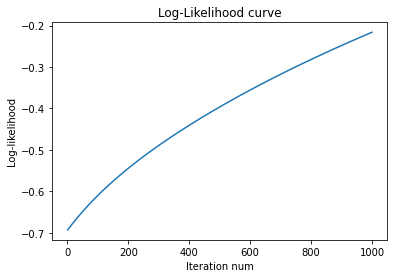

In [ ]:
plt.plot([i+1 for i in range(len(model.likelihoods))], model.likelihoods)
plt.title("Log-Likelihood curve")
plt.xlabel("Iteration num")
plt.ylabel("Log-likelihood")
plt.show()

### Algorithm Nayive bayes

In [ ]:
priors = [no / len(df) for no in [df['Family'].value_counts()[cls] for cls in classes]]
print(priors)
dfs = [df[df['Family'] == cls] for cls in classes]
Xcs = [df.iloc[:, :-1] for df in dfs]     #choose values for 4 class in family
ycs = [df.iloc[:, -1] for df in dfs]      #choose labels for 4 class in family

ps_prior = []
#split dataset to train and test 
#use zip in for loop: create an iterator that produces tuples of the form (x, y)
tts = [train_test_split(X, y, test_size = 0.3, random_state = 42) for X, y in zip(Xcs, ycs)]

means = [np.mean(t[0], axis=0) for t in tts]  #find mean along coloumn
#print(len(means)) # we have 4 mean for each of our class
covs = [np.cov(t[0], rowvar=False) for t in tts]    # rowvar=false:each column represents a variable, while the rows contain observations.
#print(len(covs)) # we have 4 cov for each of our class

#Initalize value 
corrects_train_prior = [0 for i in range(len(classes))]
wrongs_train_prior = [0 for i in range(len(classes))]
accs_train_prior = [0 for i in range(len(classes))]
corrects_test_prior = [0 for i in range(len(classes))]
wrongs_test_prior = [0 for i in range(len(classes))]
accs_test_prior = [0 for i in range(len(classes))]

for i, cls in enumerate(classes):
  start = timeit.default_timer() 
  print(f'Calculating class {cls} performance...')
  Xtrain, Xtest, ytrain, ytest = list(map(np.array, tts[i]))
  ps_prior = [[priors[k] * multivariate_normal.pdf(Xtrain[j], mean = means[k], cov = covs[k], allow_singular = True) for k in range(len(classes))] for j in tqdm(range(len(Xtrain)))]
  ps_prior = np.argmax(ps_prior, axis=-1)
  corrects_train_prior[i] = len(ps_prior[ps_prior == i])
  wrongs_train_prior[i] = len(ps_prior[ps_prior != i])
  accs_train_prior[i] = corrects_train_prior[i] / len(Xtrain)

  ps_prior = [[multivariate_normal.pdf(Xtest[j], mean = means[k], cov = covs[k], allow_singular = True) for k in range(len(classes))] for j in tqdm(range(len(Xtest)))]
  ps_prior = np.argmax(ps_prior, axis=-1)
  corrects_test_prior[i] = len(ps_prior[ps_prior == i])
  wrongs_test_prior[i] = len(ps_prior[ps_prior != i])
  accs_test_prior[i] = corrects_test_prior[i] / len(Xtest)
  stop = timeit.default_timer()

print("\n")
print("time is {}".format(stop - start))
print("\n")
print(corrects_train_prior, wrongs_train_prior, accs_train_prior)
print(corrects_test_prior, wrongs_test_prior, accs_test_prior)


[0.6144008896302474, 0.07534056157909369, 0.300806227411732, 0.009452321378926884]
Calculating class Leptodactylidae performance...


100%|██████████| 1326/1326 [00:02<00:00, 602.81it/s]


Calculating class Dendrobatidae performance...


100%|██████████| 163/163 [00:00<00:00, 585.10it/s]


Calculating class Hylidae performance...


100%|██████████| 650/650 [00:01<00:00, 608.00it/s]


Calculating class Bufonidae performance...


100%|██████████| 21/21 [00:00<00:00, 556.93it/s]




time is 0.16212046100002908


[3021, 370, 1428, 47] [73, 9, 86, 0] [0.9764059469941823, 0.9762532981530343, 0.9431968295904888, 1.0]
[1271, 158, 620, 16] [55, 5, 30, 5] [0.9585218702865762, 0.9693251533742331, 0.9538461538461539, 0.7619047619047619]


100%|██████████| 7194/7194 [00:13<00:00, 548.36it/s]


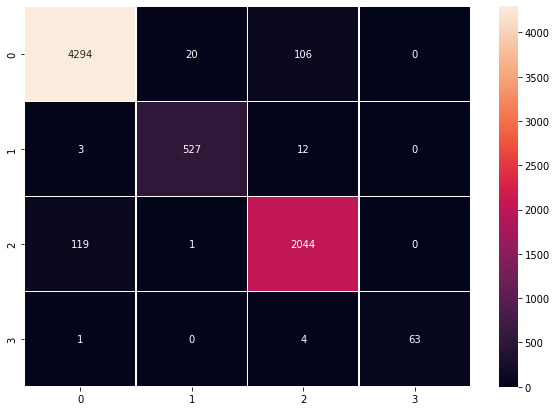

In [ ]:
Xarr = np.array(X)
ps_prior = [[priors[k] * multivariate_normal.pdf(Xarr[j], mean = means[k], cov = covs[k], allow_singular = True) for k in range(len(classes))] for j in tqdm(range(len(X)))]
ps_prior = np.argmax(ps_prior, axis=-1)

conf = confusion_matrix(y, ps_prior) 
plt.figure(figsize = (10,7))
sns.heatmap(conf, annot=True, fmt = "d", linewidths = 0.5)
plt.show()

### Logistic Regression with regularization term

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


Confusion matrix:
 [[3435   24   77    0]
 [  13  397   24    0]
 [ 180   44 1507    0]
 [   6    1   47    0]]
Training accuracy: 92.7715 %
Train matrix acc: [91.76368375325804, 92.70199826238054, 92.98001737619461, 92.77150304083406]
testing accuracy: 94.0236 %
test matrix acc: [92.2168172341904, 94.02362751911049, 94.30159833217512, 94.02362751911049]
Time:  [0.0036186820000239095, 0.003429331999996066, 0.003353259999983038, 0.00337644299997919]
overal time:  0.4782795309999983


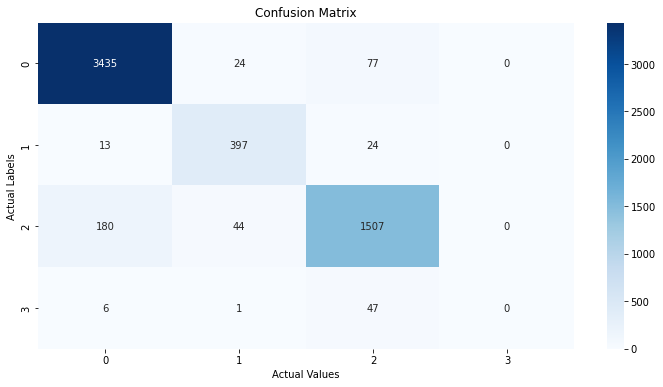

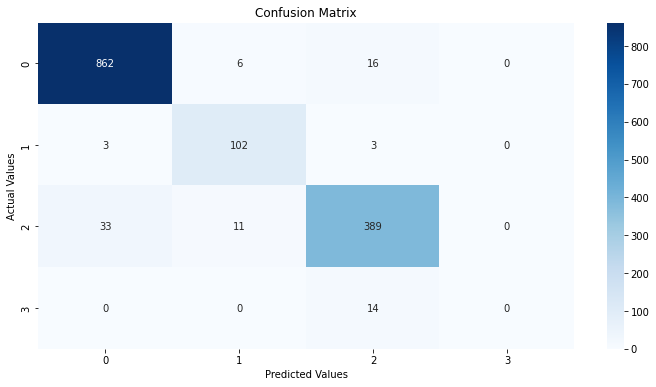

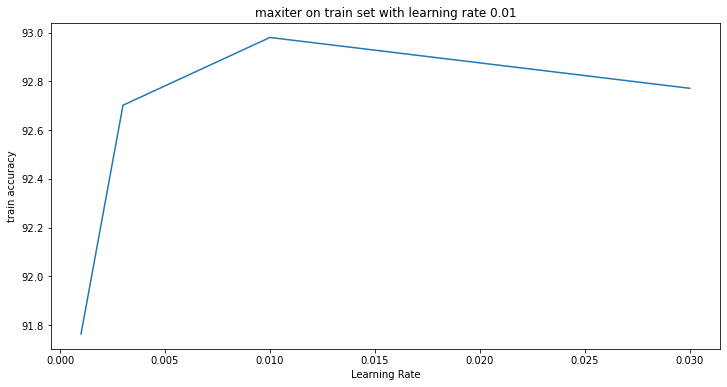

<Figure size 432x288 with 0 Axes>

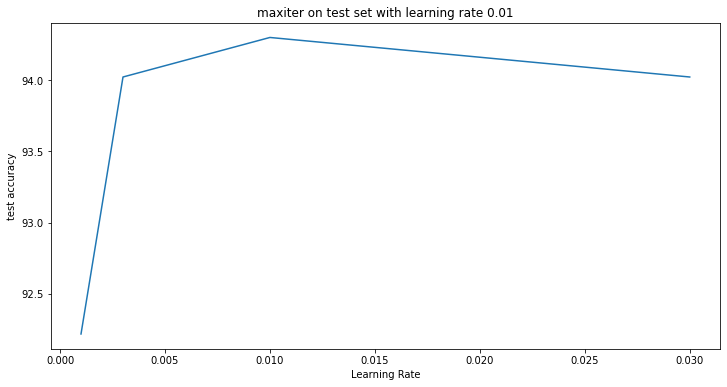

<Figure size 432x288 with 0 Axes>

In [ ]:
#Evaluate Model on training set
start = timeit.default_timer()
learningrate = 0.01
max_iter_list = [10, 40, 70, 100]
train_acc_matrix = []
test_acc_matrix = []
time_matrix = []
zero = 0
for i in max_iter_list:
  model = SGDClassifier(max_iter = i, penalty = 'elasticnet', learning_rate = 'constant', eta0 = learningrate)
  # model = LogisticRegression(max_iter=maxiter)
  #train model
  model.fit(X_train,y_train)
  train_acc = model.score(X_train, y_train)
  # print("the accuracy for training set is {}".format(train_acc*100))
  #training score
  y_train_hat = model.predict(X_train)
  train_acc = accuracy_score(y_train, y_train_hat)*100
  train_acc_matrix.append(train_acc)
  cm_train = confusion_matrix(y_train, y_train_hat)
  
  #Evalute Model on test set
  start = timeit.default_timer()
  y_test_hat = model.predict(X_test)
  test_acc = accuracy_score(y_test, y_test_hat)*100
  test_acc_matrix.append(test_acc)
  # print('Confusion matrix:\n', confusion_matrix(y_test, y_test_hat))
  # print('Testing accuracy: %.4f %%' % test_acc) 
  cm_test=confusion_matrix(y_test,y_test_hat)
  stop = timeit.default_timer()
  time_matrix.append(stop - start)
  

#train
print('Confusion matrix:\n', cm_train)
print('Training accuracy: %.4f %%' % train_acc)
print('Train matrix acc:', train_acc_matrix)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm_train, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Labels")
plt.xlabel("Actual Values")
plt.savefig('confusion_matrix_training_maxiter.png')

#test
print('testing accuracy: %.4f %%' % test_acc)
print('test matrix acc:', test_acc_matrix)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm_test, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix_testing_maxiter.png')
stop = timeit.default_timer()

print('Time: ', time_matrix, end='\n')
print('overal time: ', stop - start) 

#learning Rate on train figure
plt.figure(figsize=(12,6))
plt.title("maxiter on train set with learning rate 0.01")
plt.xlabel("Learning Rate")
plt.ylabel("train accuracy")
plt.plot(learning_rate_list ,train_acc_matrix)
plt.show()
plt.savefig('train acc maxiter.png')

#learning rate on test figure
plt.figure(figsize=(12,6))
plt.title("maxiter on test set with learning rate 0.01")
plt.xlabel("Learning Rate")
plt.ylabel("test accuracy")
plt.plot(learning_rate_list ,test_acc_matrix)
plt.show()
plt.savefig('test acc maxiter.png')

##Part B: Kfold

In [ ]:
n_fold = 3
X_trainf, X_testf, y_trainf, y_testf = train_test_split(X, y, test_size = 1/n_fold, random_state = 5, stratify = y)

Confusion matrix:
 [[3452   23   61    0]
 [  16  396   22    0]
 [ 179   30 1522    0]
 [   7    0   47    0]]
Training accuracy: 93.3102 %
Train matrix acc: [93.13640312771503, 93.10165073848827, 93.31016507384882]
Average of training is 93.18273964668404
testing accuracy: 94.1626 %
test matrix acc: [94.23210562890897, 94.23210562890897, 94.1626129256428]
Average of testing is 94.20894139448691
overal time:  0.8332986629999937


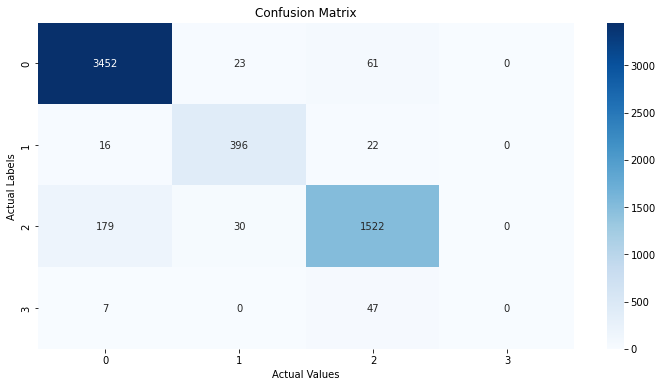

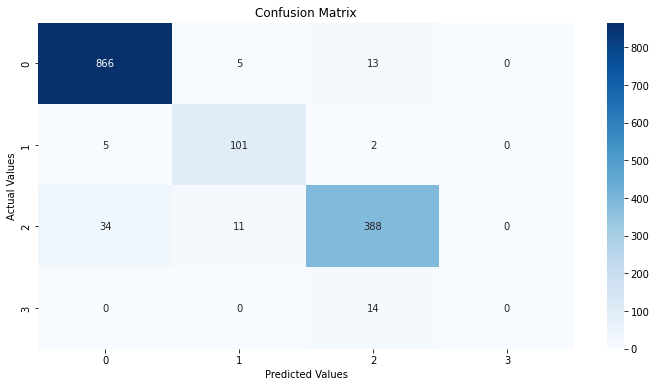

In [ ]:
#Evaluate Model on training set
start = timeit.default_timer()
lr = 0.03
maxiter = 70
train_acc_matrix = []
test_acc_matrix = []
# time_matrix = []
n_fold = 3

for i in range(3):
  X_trainf, X_testf, y_trainf, y_testf = train_test_split(X, y, test_size = 1/n_fold, random_state = 5, stratify = y)
  model = SGDClassifier(max_iter = maxiter, learning_rate = 'constant', eta0 = lr )
  # model = LogisticRegression(max_iter=maxiter)
  #train model
  model.fit(X_train,y_train)
  train_acc = model.score(X_train, y_train)
  # print("the accuracy for training set is {}".format(train_acc*100))
  #training score
  y_train_hat = model.predict(X_train)
  train_acc = accuracy_score(y_train, y_train_hat)*100
  train_acc_matrix.append(train_acc)
  # cm_train = confusion_matrix(y_train, y_train_hat)
  
  #Evalute Model on test set
  # start = timeit.default_timer()
  y_test_hat = model.predict(X_test)
  test_acc = accuracy_score(y_test, y_test_hat)*100
  test_acc_matrix.append(test_acc)
  # print('Confusion matrix:\n', confusion_matrix(y_test, y_test_hat))
  # print('Testing accuracy: %.4f %%' % test_acc) 
  # cm_test=confusion_matrix(y_test,y_test_hat)
  # stop = timeit.default_timer()
  # time_matrix.append(stop - start)
  


#Confusion matrix
cm_train = confusion_matrix(y_train, y_train_hat)
cm_test=confusion_matrix(y_test,y_test_hat)

#train
print('Confusion matrix:\n', cm_train)
print('Training accuracy: %.4f %%' % train_acc)
print('Train matrix acc:', train_acc_matrix)
print('Average of training is {}'.format(mean(train_acc_matrix)))

plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm_train, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Labels")
plt.xlabel("Actual Values")
plt.savefig('confusion_matrix_training.png')

#test
print('testing accuracy: %.4f %%' % test_acc)
print('test matrix acc:', test_acc_matrix)
print('Average of testing is {}'.format(mean(test_acc_matrix)))

plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm_test, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix_testing.png')
stop = timeit.default_timer()

# print('Time: ', time_matrix, end='\n')
print('overal time: ', stop - start)

###Regularization term

Confusion matrix:
 [[3458   25   53    0]
 [  15  402   17    0]
 [ 190   41 1500    0]
 [   7    0   47    0]]
Training accuracy: 93.1364 %
Train matrix acc: [93.18853171155517, 93.50130321459599, 93.13640312771503]
Average in training set on kfold mode is 93.27541268462207
testing accuracy: 94.0931 %
test matrix acc: [94.23210562890897, 94.23210562890897, 94.09312022237664]
Average in testing set on kfold mode is 94.18577716006486
Time:  [0.0036186820000239095, 0.003429331999996066, 0.003353259999983038, 0.00337644299997919]
overal time:  1.697956769999962


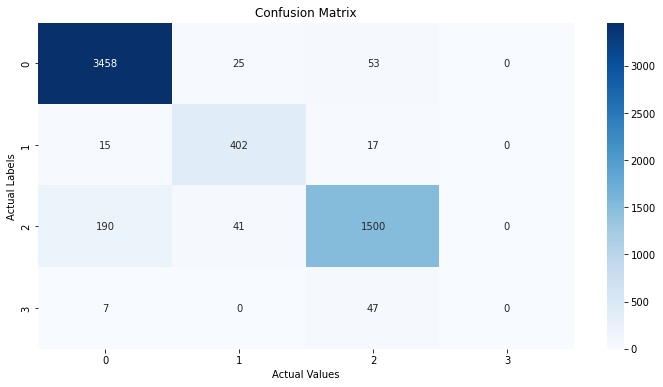

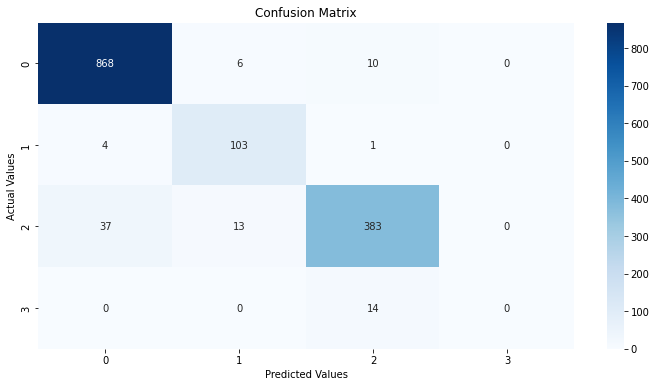

In [ ]:
#Evaluate Model on training set
start = timeit.default_timer()
lr = 0.03
maxiter = 70
train_acc_matrix = []
test_acc_matrix = []
n_fold = 3

for i in range(3):
  X_trainf, X_testf, y_trainf, y_testf = train_test_split(X, y, test_size = 1/n_fold, random_state = 5, stratify = y)
  model = SGDClassifier(max_iter = maxiter, penalty = 'elasticnet', learning_rate = 'constant', eta0 = lr)
  #train model
  model.fit(X_train,y_train)
  train_acc = model.score(X_train, y_train)
  # print("the accuracy for training set is {}".format(train_acc*100))
  #training score
  y_train_hat = model.predict(X_train)
  train_acc = accuracy_score(y_train, y_train_hat)*100
  train_acc_matrix.append(train_acc)

  
  #Evalute Model on test set
  y_test_hat = model.predict(X_test)
  test_acc = accuracy_score(y_test, y_test_hat)*100
  test_acc_matrix.append(test_acc)
  # print('Confusion matrix:\n', confusion_matrix(y_test, y_test_hat))
  # print('Testing accuracy: %.4f %%' % test_acc)   

#train
cm_train = confusion_matrix(y_train, y_train_hat)
print('Confusion matrix:\n', cm_train)
print('Training accuracy: %.4f %%' % train_acc)
print('Train matrix acc:', train_acc_matrix)
print("Average in training set on kfold mode is {}".format(mean(train_acc_matrix)))

plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm_train, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Labels")
plt.xlabel("Actual Values")
plt.savefig('confusion_matrix_training_maxiter.png')

#test
cm_test=confusion_matrix(y_test,y_test_hat)
print('testing accuracy: %.4f %%' % test_acc)
print('test matrix acc:', test_acc_matrix)
print("Average in testing set on kfold mode is {}".format(mean(test_acc_matrix)))

plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm_test, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix_testing_maxiter.png')
stop = timeit.default_timer()

print('Time: ', time_matrix, end='\n')
print('overal time: ', stop - start) 